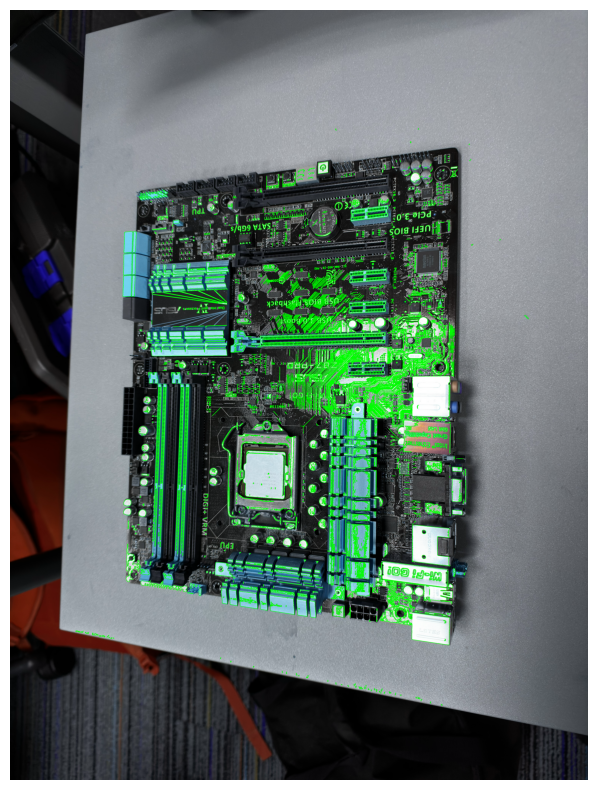

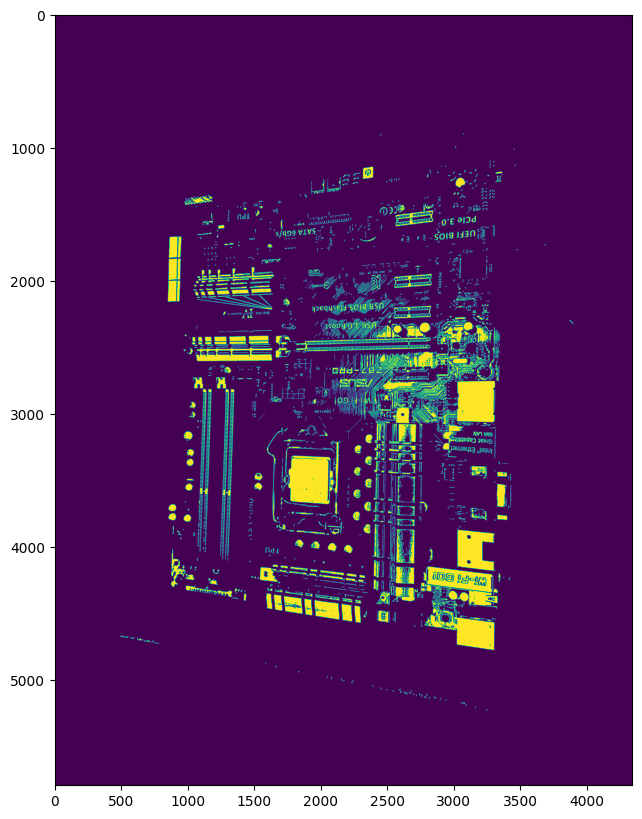

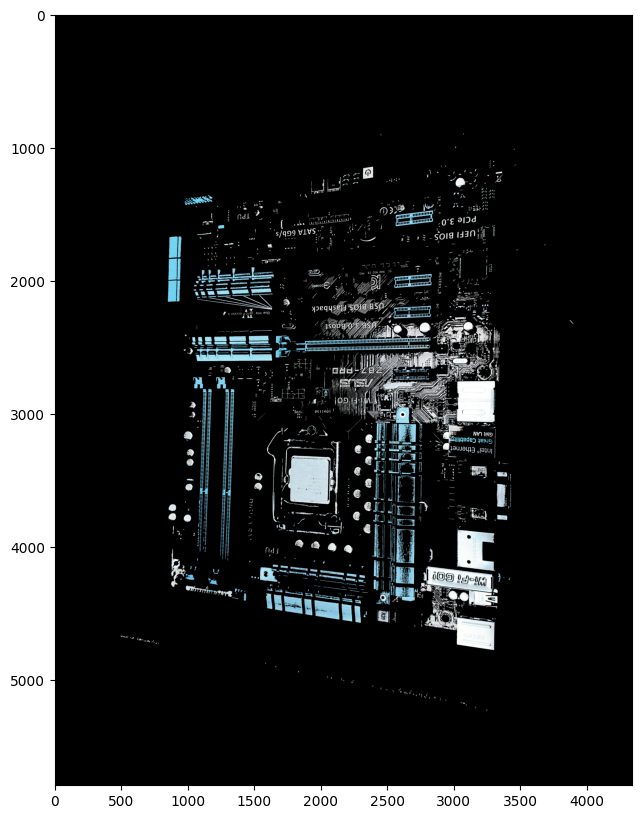

In [3]:
#Step 1
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import cv2
from google.colab.patches import cv2_imshow

# Read the input image
image = cv2.imread('motherboard_image.JPEG')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (7, 7), 0)

# Apply thresholding to create a binary mask
_, binary_mask = cv2.threshold(gray, 190, 255, cv2.THRESH_BINARY)

# Optional: Create a specific mask (e.g., based on a contour)
contours, _ = cv2.findContours(binary_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
filtered_contours = [contour for contour in contours if cv2.contourArea(contour) > 20]
mask = np.zeros_like(gray)
image_copy=image.copy()
cv2.drawContours(mask, filtered_contours, -1, (255,255,255), -1)
cv2.drawContours(image_copy, filtered_contours, -1, (0,255,0), 2)

# Use cv2.bitwise_and to extract the region
extracted_image = cv2.bitwise_and(image, image, mask=mask)
# see the results
fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
plt.rcParams['figure.figsize'] = [20, 10]
plt.imshow(image_copy)
plt.show()
plt.imshow(mask)
plt.show()
plt.imshow(extracted_image)
plt.show()